# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [6]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen',
          'king is a strong man',
          'queen is a wise woman', 
          'queen is a beautiful woman', 
          'king is the most wise man']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [12]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be', 'the']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results

In [13]:
corpus = remove_stop_words(corpus)

In [14]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen',
 'king strong man',
 'queen wise woman',
 'queen beautiful woman',
 'king most wise man']

In [15]:
words = []
for text in corpus:
    print(text)
    for word in text.split(' '):
        words.append(word)
print(words)
words = set(words)
print(len(words))

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen
king strong man
queen wise woman
queen beautiful woman
king most wise man
['king', 'strong', 'man', 'queen', 'wise', 'woman', 'boy', 'young', 'man', 'girl', 'young', 'woman', 'prince', 'young', 'king', 'princess', 'young', 'queen', 'man', 'strong', 'woman', 'pretty', 'prince', 'boy', 'king', 'princess', 'girl', 'queen', 'king', 'strong', 'man', 'queen', 'wise', 'woman', 'queen', 'beautiful', 'woman', 'king', 'most', 'wise', 'man']
14


here we have word set by which we will have word vector

In [16]:
words

{'beautiful',
 'boy',
 'girl',
 'king',
 'man',
 'most',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [17]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i
print(word2int)

{'pretty': 0, 'woman': 1, 'most': 2, 'princess': 3, 'strong': 4, 'king': 5, 'girl': 6, 'queen': 7, 'wise': 8, 'prince': 9, 'boy': 10, 'beautiful': 11, 'young': 12, 'man': 13}


In [18]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
print(sentences)

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen'], ['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['queen', 'beautiful', 'woman'], ['king', 'most', 'wise', 'man']]


In [19]:

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] :
            if neighbor != word:
                data.append([word, neighbor])
for d in data:
  print(d)

['king', 'strong']
['king', 'man']
['strong', 'king']
['strong', 'man']
['man', 'king']
['man', 'strong']
['queen', 'wise']
['queen', 'woman']
['wise', 'queen']
['wise', 'woman']
['woman', 'queen']
['woman', 'wise']
['boy', 'young']
['boy', 'man']
['young', 'boy']
['young', 'man']
['man', 'boy']
['man', 'young']
['girl', 'young']
['girl', 'woman']
['young', 'girl']
['young', 'woman']
['woman', 'girl']
['woman', 'young']
['prince', 'young']
['prince', 'king']
['young', 'prince']
['young', 'king']
['king', 'prince']
['king', 'young']
['princess', 'young']
['princess', 'queen']
['young', 'princess']
['young', 'queen']
['queen', 'princess']
['queen', 'young']
['man', 'strong']
['strong', 'man']
['woman', 'pretty']
['pretty', 'woman']
['prince', 'boy']
['prince', 'king']
['boy', 'prince']
['boy', 'king']
['king', 'prince']
['king', 'boy']
['princess', 'girl']
['princess', 'queen']
['girl', 'princess']
['girl', 'queen']
['queen', 'princess']
['queen', 'girl']
['king', 'strong']
['king', 'man

In [20]:
import pandas as pd
df = pd.DataFrame(data, columns = ['input', 'label'])
print(df)


     input   label
0     king  strong
1     king     man
2   strong    king
3   strong     man
4      man    king
..     ...     ...
75    wise    king
76    wise    most
77    wise     man
78     man    most
79     man    wise

[80 rows x 2 columns]


In [21]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [22]:
df.shape

(80, 2)

In [23]:
word2int

{'pretty': 0,
 'woman': 1,
 'most': 2,
 'princess': 3,
 'strong': 4,
 'king': 5,
 'girl': 6,
 'queen': 7,
 'wise': 8,
 'prince': 9,
 'boy': 10,
 'beautiful': 11,
 'young': 12,
 'man': 13}

# Define Tensorflow Graph

In [24]:
import numpy as np
import tensorflow as tf

2025-02-17 10:21:40.826728: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 10:21:40.855262: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 10:21:41.008296: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 10:21:41.008353: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 10:21:41.009089: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [27]:
ONE_HOT_DIM = len(words)

def one_hot_encode(data_point_index):
    one_hot_vector = np.zeros(ONE_HOT_DIM)
    one_hot_vector[data_point_index] = 1
    return one_hot_vector


X = []
Y = []
for x, y in zip(df['input'], df['label']):
    X.append(one_hot_encode(word2int[x]))
    Y.append(one_hot_encode(word2int[y]))
    
print(f"printing X: {X}")
print(f"printing Y: {Y}")

printing X: [array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0

In [35]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making inputs for X_train and Y_train using keras Input layer
x = tf.keras.Input(shape=(ONE_HOT_DIM,))
y_label = tf.keras.Input(shape=(ONE_HOT_DIM,))

# Create model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(EMBEDDING_DIM, input_shape=(ONE_HOT_DIM,)),
    tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, 
                   epochs=20000,
                   verbose=1,
                   batch_size=len(X_train))

# Get the word embeddings (they're in the first layer's weights)
word_vectors = model.layers[0].get_weights()[0]

ValueError: `tape` is required when a `Tensor` loss is passed. Received: loss=KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.keras.backend.categorical_crossentropy/Neg:0', description="created by layer 'tf.keras.backend.categorical_crossentropy'"), tape=None.

In [ ]:
print(word2int['man'])

NameError: ignored

# Train

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.3874831
iteration 3000 loss is :  1.7615176
iteration 6000 loss is :  1.7135644
iteration 9000 loss is :  1.6936957
iteration 12000 loss is :  1.6818337
iteration 15000 loss is :  1.6735965
iteration 18000 loss is :  1.667389


In [ ]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 4.375873    0.16186821]
 [ 0.19360328  1.7890494 ]
 [ 6.1193333  -0.08758414]
 [-1.2201542   4.6891165 ]
 [-0.20656192 -0.23423088]
 [-0.01745999  5.9915733 ]
 [-2.5089917  -0.02818429]
 [ 4.438786   -2.2695527 ]
 [-0.3406      1.524016  ]
 [ 1.0877191  -0.10649729]
 [-0.20683467  0.7571343 ]
 [ 1.1867361  -0.2494669 ]]


# word vector in table

In [ ]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,man,4.375873,0.161868
1,woman,0.193603,1.789049
2,prince,6.119333,-0.087584
3,wise,-1.220154,4.689116
4,young,-0.206562,-0.234231
5,princess,-0.017460,5.991573
6,pretty,-2.508992,-0.028184
7,strong,4.438786,-2.269553
8,girl,-0.340600,1.524016
9,king,1.087719,-0.106497


# word vector in 2d chart

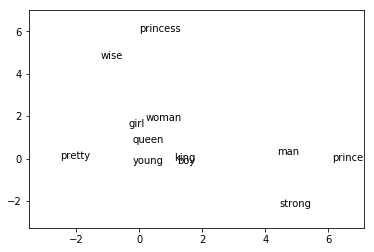

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()